# Orbit Homework

Katie Foster

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
radians = UNITS.radian
degrees = UNITS.degrees;

In [16]:
# And an inition condition (with everything in SI units)

r_0 = 147e9 * m

x_0 = 1.52e11 * m
y_0 = 0 * m
vx_0 = 0 * m / s
vy_0 = 30000 * m / s

init = State(x = x_0,
             y = y_0, 
             vx = vx_0,
             vy = vy_0)

,values
x,152000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,30000.0 meter / second


In [52]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=3.154e7 * s)

,values
init,x 152000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
m2,5.972e+24 kilogram
t_0,0 second
t_end,31540000.0 second


In [42]:
def universal_gravitation(r, system):
    """Computes gravitational force using law of universal gravitation 
    and returns a vector representing force in the x and y directions"""
    unpack(system)
    
    Fg = G * m1 * m2 / (r.mag **2) #uses law of universal gravitation to find earth-sun force
    θ = -r.hat() #represents the direction of a vector as a unit vector
    
    ForceVector = Fg * θ 
    
    return ForceVector


In [43]:
r = Vector(init.x, init.y)

<Quantity([1.52e+11 0.00e+00], 'meter')>

In [44]:
universal_gravitation(r, system)

<Quantity([-3.43125985e+22 -0.00000000e+00], 'newton')>

In [45]:
def slope_func(state, t, system):
    '''Slope function takes in state, t, and system, and uses the force
    from universal gravitation function to calculate acceleration in the x and y
    directions and then returns change in velocity and change in position'''
    x, y, vx, vy = state
    unpack(system)    
    
    r = Vector(x, y)

    force = universal_gravitation(r, system)
    acceleration = force/m2 
    dvxdt, dvydt = acceleration[0], acceleration[1]
    dxdt, dydt = vx, vy
    
    return dxdt, dydt, dvxdt, dvydt

In [59]:
ts = linspace(t_0, t_final, 200)

<Quantity([       0.           158492.46231156   316984.92462312   475477.38693467
   633969.84924623   792462.31155779   950954.77386935  1109447.2361809
  1267939.69849246  1426432.16080402  1584924.62311558  1743417.08542714
  1901909.54773869  2060402.01005025  2218894.47236181  2377386.93467337
  2535879.39698492  2694371.85929648  2852864.32160804  3011356.7839196
  3169849.24623116  3328341.70854271  3486834.17085427  3645326.63316583
  3803819.09547739  3962311.55778894  4120804.0201005   4279296.48241206
  4437788.94472362  4596281.40703518  4754773.86934673  4913266.33165829
  5071758.79396985  5230251.25628141  5388743.71859297  5547236.18090452
  5705728.64321608  5864221.10552764  6022713.5678392   6181206.03015075
  6339698.49246231  6498190.95477387  6656683.41708543  6815175.87939698
  6973668.34170854  7132160.8040201   7290653.26633166  7449145.72864322
  7607638.19095477  7766130.65326633  7924623.11557789  8083115.57788945
  8241608.040201    8400100.50251256  8558592.96482412  8717085.42713568
  8875577.88944724  9034070.35175879  9192562.81407035  9351055.27638191
  9509547.73869347  9668040.20100502  9826532.66331658  9985025.12562814
 10143517.5879397  10302010.05025126 10460502.51256281 10618994.97487437
 10777487.43718593 10935979.89949749 11094472.36180905 11252964.8241206
 11411457.28643216 11569949.74874372 11728442.21105528 11886934.67336683
 12045427.13567839 12203919.59798995 12362412.06030151 12520904.52261307
 12679396.98492462 12837889.44723618 12996381.90954774 13154874.3718593
 13313366.83417085 13471859.29648241 13630351.75879397 13788844.22110553
 13947336.68341709 14105829.14572864 14264321.6080402  14422814.07035176
 14581306.53266332 14739798.99497487 14898291.45728643 15056783.91959799
 15215276.38190955 15373768.84422111 15532261.30653266 15690753.76884422
 15849246.23115578 16007738.69346734 16166231.15577889 16324723.61809045
 16483216.08040201 16641708.54271357 16800201.00502513 16958693.46733668
 17117185.92964824 17275678.3919598  17434170.85427136 17592663.31658291
 17751155.77889447 17909648.24120603 18068140.70351759 18226633.16582914
 18385125.6281407  18543618.09045226 18702110.55276382 18860603.01507538
 19019095.47738693 19177587.93969849 19336080.40201005 19494572.86432161
 19653065.32663317 19811557.78894472 19970050.25125628 20128542.71356784
 20287035.1758794  20445527.63819095 20604020.10050251 20762512.56281407
 20921005.02512563 21079497.48743718 21237989.94974874 21396482.4120603
 21554974.87437186 21713467.33668341 21871959.79899497 22030452.26130653
 22188944.72361809 22347437.18592965 22505929.64824121 22664422.11055276
 22822914.57286432 22981407.03517588 23139899.49748744 23298391.959799
 23456884.42211055 23615376.88442211 23773869.34673367 23932361.80904523
 24090854.27135678 24249346.73366834 24407839.1959799  24566331.65829146
 24724824.12060301 24883316.58291457 25041809.04522613 25200301.50753769
 25358793.96984924 25517286.4321608  25675778.89447236 25834271.35678392
 25992763.81909548 26151256.28140704 26309748.74371859 26468241.20603015
 26626733.66834171 26785226.13065327 26943718.59296482 27102211.05527638
 27260703.51758794 27419195.9798995  27577688.44221105 27736180.90452261
 27894673.36683417 28053165.82914573 28211658.29145728 28370150.75376884
 28528643.2160804  28687135.67839196 28845628.14070352 29004120.60301508
 29162613.06532663 29321105.52763819 29479597.98994975 29638090.45226131
 29796582.91457286 29955075.37688442 30113567.83919598 30272060.30150754
 30430552.76381909 30589045.22613065 30747537.68844221 30906030.15075377
 31064522.61306532 31223015.07537688 31381507.53768844 31540000.        ], 'second')>

In [65]:
results, details = run_ode_solver(system, slope_func, t_eval=ts)
details;

In [66]:
slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(30000.0, 'meter / second')>,
 <Quantity(-0.005745579120498614, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [67]:
t_final = get_last_label(results) * s

<Quantity(31540000.0, 'second')>

In [68]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

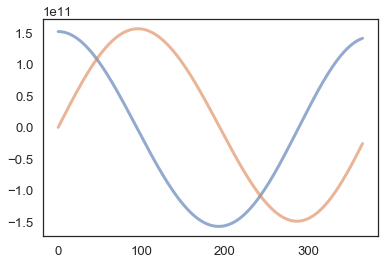

In [69]:
plot(results.x, label='x')
plot(results.y, label='y')

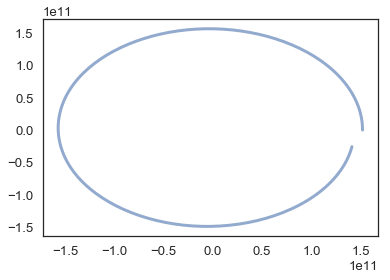

In [70]:
plot(results.x, results.y, label='')
